In [92]:
import numpy as np
import pandas as pd

In [93]:
datasetproduct_url = "D:/KULIAH/SEMESTER 6/TID046301 Data Analytics and Visualization/final-project/data-collection-preprocessing/data-produk/clean_product-goodgamingshop.csv"
datasetreview_url = "D:/KULIAH/SEMESTER 6/TID046301 Data Analytics and Visualization/final-project/data-collection-preprocessing/data-ulasan-clean/clean_data-ulasan-goodgamingstore.csv"

In [94]:
dfori_product = pd.read_csv(datasetproduct_url)
dfori_review = pd.read_csv(datasetreview_url)

In [95]:
df_product = dfori_product.copy()
df_review = dfori_review.copy()

In [96]:
df_review.head()

,id_produk,nama_produk,review,id_user,nama_akun,rating_user,ulasan_produk,waktu_review,varian_produk
0,PI2563,Pulsar X2 MINI RandomFrankP Edition WIreless G...,1,UI0001,Bimo,5,Nyaman dan praktis tinggal plug and play,Lebih dari 1 tahun lalu,none
1,PI2564,Melgeek Mojo68 Retro - Mechanical Keyboard,1,UI0002,S***m,5,"Keren memang mojo68 retro, sayang typing sound...",9 bulan lalu,Varian: Gat Silver Pro
2,PI2567,Redragon K608 Full size Mechanical - Gaming Ke...,1,UI0003,Riski,5,"buat yg nyari suara pas ngetik, bisa beli yg s...",Lebih dari 1 tahun lalu,Varian: Brown Switch
3,PI2569,CORSAIR MM300 EXTENDED GAMING MOUSEPAD SPEED,1,UI0004,S***o,5,"rapih, material bagus, nyaman digunakan, dimen...",Lebih dari 1 tahun lalu,none
4,PI2573,ZOOM75 Essential Edition Strawberry IceCream B...,1,UI0005,Winardi,5,Kedua kali beli Zoom75 disini and never dissap...,3 bulan lalu,none


In [97]:
df_review.dtypes

id_produk        object
nama_produk      object
review            int64
id_user          object
nama_akun        object
rating_user       int64
ulasan_produk    object
waktu_review     object
varian_produk    object
dtype: object

In [98]:
df_review = df_review.drop('review', axis=1)

In [99]:
# Mengonversi setiap nilai dalam kolom menjadi string
df_review['id_produk'] = df_review['id_produk'].apply(str)
df_review['nama_produk'] = df_review['nama_produk'].apply(str)
df_review['id_user'] = df_review['id_user'].apply(str)
df_review['nama_akun'] = df_review['nama_akun'].apply(str)
df_review['rating_user'] = df_review['rating_user'].apply(int)
df_review['ulasan_produk'] = df_review['ulasan_produk'].apply(str)
df_review['waktu_review'] = df_review['waktu_review'].apply(str)
df_review['varian_produk'] = df_review['varian_produk'].apply(str)

In [100]:
df_review.dtypes

id_produk        object
nama_produk      object
id_user          object
nama_akun        object
rating_user       int64
ulasan_produk    object
waktu_review     object
varian_produk    object
dtype: object

In [101]:
df_review.isnull().sum()

id_produk        0
nama_produk      0
id_user          0
nama_akun        0
rating_user      0
ulasan_produk    0
waktu_review     0
varian_produk    0
dtype: int64

In [102]:
df_product.dtypes

id_produk           object
nama_produk         object
kategori_produk     object
jumlah_terjual       int64
harga_jual           int64
harga_awal           int64
diskon             float64
deskripsi           object
rating             float64
rating_counter       int64
link                object
dtype: object

In [103]:
df_product['kategori_produk'].head(3)

0    Home|Komputer & Laptop|Aksesoris PC Gaming|Gam...
1    Home|Komputer & Laptop|Aksesoris PC Gaming|Gam...
2    Home|Komputer & Laptop|Aksesoris Komputer & La...
Name: kategori_produk, dtype: object

In [104]:
new_cat = df_product['kategori_produk'].str.split('|', expand=True)
new_cat

,0,1,2,3
0,Home,Komputer & Laptop,Aksesoris PC Gaming,Game Capture Card & Stream Deck
1,Home,Komputer & Laptop,Aksesoris PC Gaming,Game Capture Card & Stream Deck
2,Home,Komputer & Laptop,Aksesoris Komputer & Laptop,Keyboard
3,Home,Komputer & Laptop,Aksesoris Komputer & Laptop,Keypad
4,Home,Perlengkapan Pesta,Bungkus Kemasan,Bubble Wrap
...,...,...,...,...
2608,Home,Komputer & Laptop,Aksesoris PC Gaming,Mouse Gaming
2609,Home,Komputer & Laptop,Aksesoris PC Gaming,Mouse Gaming
2610,Home,Komputer & Laptop,Aksesoris PC Gaming,Mouse Gaming
2611,Home,Komputer & Laptop,Aksesoris PC Gaming,Keyboard Gaming


In [105]:
new_cat['category_1'] = new_cat[1]
new_cat['category_2'] = new_cat[2]
new_cat['category_3'] = new_cat[3]

In [106]:
df_product.drop('kategori_produk', axis=1, inplace=True)
df_product['kategori_1'] = new_cat['category_1']
df_product['kategori_2'] = new_cat['category_2']
df_product['kategori_3'] = new_cat['category_3']

In [107]:
df_product['kategori_1'].value_counts()

kategori_1
Komputer & Laptop                                                                 2401
Audio, Kamera & Elektronik Lainnya                                                  81
Film & Musik                                                                        42
Gaming                                                                              33
Handphone & Tablet                                                                  13
Pertukangan                                                                          9
Rumah Tangga                                                                         8
Elektronik                                                                           6
Perlengkapan Pesta                                                                   4
Olahraga                                                                             4
Fashion Pria                                                                         4
Mainan & Hobi                   

In [113]:
df_product['kategori_1'] = df_product['kategori_1'].replace({
    'BenQ EW3270U 4K Video Enjoyment Monitor with Eye-care Technology 32" - EW3270U': 'Komputer & Laptop',
    'LG 27GK750F - Gaming Monitor': 'Komputer & Laptop',
    'MSi Optix MAG341CQ - Gaming Monitor': 'Komputer & Laptop'
})

In [115]:
df_product['kategori_1'].value_counts()

kategori_1
Komputer & Laptop                     2404
Audio, Kamera & Elektronik Lainnya      81
Film & Musik                            42
Gaming                                  33
Handphone & Tablet                      13
Pertukangan                              9
Rumah Tangga                             8
Elektronik                               6
Perlengkapan Pesta                       4
Olahraga                                 4
Fashion Pria                             4
Mainan & Hobi                            3
Office & Stationery                      1
Dapur                                    1
Name: count, dtype: int64

In [118]:
df_product['kategori_2'].value_counts()

kategori_2
Aksesoris PC Gaming                                                               1881
Aksesoris Komputer & Laptop                                                        295
Monitor                                                                            157
Audio                                                                               74
Vokal                                                                               37
Komponen Komputer                                                                   24
Kabel & Adaptor                                                                     21
Aksesoris Mobile Gaming                                                             20
PC & Laptop Gaming                                                                  13
Aksesoris Handphone                                                                 12
Furniture                                                                            8
Aksesoris Game Console          

In [122]:
mapping_kategori = {
    'MSi Optix MAG341CQ - Gaming Monitor': 'Monitor',
    'LG 27GK750F - Gaming Monitor': 'Monitor',
    'BenQ EW3270U 4K Video Enjoyment Monitor with Eye-care Technology 32" - EW3270U': 'Monitor'
}

df_product['kategori_2'] = df_product['kategori_2'].map(mapping_kategori).fillna(df_product['kategori_2'])

In [123]:
df_product['kategori_2'].value_counts()

kategori_2
Aksesoris PC Gaming             1881
Aksesoris Komputer & Laptop      295
Monitor                          160
Audio                             74
Vokal                             37
Komponen Komputer                 24
Kabel & Adaptor                   21
Aksesoris Mobile Gaming           20
PC & Laptop Gaming                13
Aksesoris Handphone               12
Furniture                          8
Aksesoris Game Console             6
Game Console                       6
TV & Aksesoris                     6
Hand Tools                         5
Keyboard & Piano                   4
Atasan Pria                        4
Networking                         4
Bungkus Kemasan                    4
Lighting & Studio                  4
Aksesoris Olahraga                 3
Media Penyimpanan Data             3
Proyektor & Aksesoris              2
Material Bangunan                  2
Document Organizer                 1
Bekal                              1
Aksesoris Kamera           

In [125]:
df_product['kategori_3'].value_counts()

kategori_3
Keyboard Gaming                    462
Mouse Gaming                       336
Headset Gaming                     333
Game Capture Card & Stream Deck    247
Kursi Gaming                       192
                                  ... 
Microphone Kamera                    1
SSD                                  1
Holder Handphone                     1
CD PC dan Laptop Gaming              1
Action Figure                        1
Name: count, Length: 99, dtype: int64

In [127]:
produk_ke_kategori = {
    'LG 27GK750F - Gaming Monitor': 'Gaming Monitor',
    'MSi Optix MAG341CQ - Gaming Monitor': 'Gaming Monitor',
    'BenQ EW3270U 4K Video Enjoyment Monitor with Eye-care Technology 32" - EW3270U': 'Monitor'
}

df_product['kategori_2'] = df_product['kategori_2'].map(produk_ke_kategori).fillna(df_product['kategori_2'])

In [128]:
df_product['kategori_3'].value_counts()

kategori_3
Keyboard Gaming                    462
Mouse Gaming                       336
Headset Gaming                     333
Game Capture Card & Stream Deck    247
Kursi Gaming                       192
                                  ... 
Microphone Kamera                    1
SSD                                  1
Holder Handphone                     1
CD PC dan Laptop Gaming              1
Action Figure                        1
Name: count, Length: 99, dtype: int64

In [129]:
df_product.isna().sum()

id_produk         0
nama_produk       0
jumlah_terjual    0
harga_jual        0
harga_awal        0
diskon            0
deskripsi         0
rating            0
rating_counter    0
link              0
kategori_1        0
kategori_2        0
kategori_3        0
dtype: int64

In [111]:
df_product.sample(5)

,id_produk,nama_produk,jumlah_terjual,harga_jual,harga_awal,diskon,deskripsi,rating,rating_counter,link,kategori_1,kategori_2,kategori_3
10,PI0011,TIGER ARC ICE EDITION Hyperglide/Hyperglides -...,1000,95000,95000,0.00,JAM OPERASIONAL\nSenin - Minggu : 10:00 - 19:0...,5.0,657,https://www.tokopedia.com/goodgamingshop/tiger...,Komputer & Laptop,Aksesoris PC Gaming,Mouse Gaming
312,PI0313,NuPhy Air75 / Air 75 RGB ANSI Hot-swappable Wi...,30,1799000,2099000,0.14,Garansi Resmi Distributor (WAJIB MENYERTA/KAN ...,5.0,18,https://www.tokopedia.com/goodgamingshop/nuphy...,Komputer & Laptop,Aksesoris PC Gaming,Keyboard Gaming
1993,PI1994,Aerocool MIRAGE L120 AIO 120MM MIRROR ARGB LIQ...,0,1369000,1369000,0.00,Garansi Resmi Distributor (WAJIB MENYERTAKAN B...,0.0,0,https://www.tokopedia.com/goodgamingshop/aeroc...,Komputer & Laptop,Komponen Komputer,Internal Fan & Cooler
1686,PI1687,NYK Nemesis Headset Bluetooth 5.3 with ANC EKH...,0,230000,230000,0.00,✅ JAM OPERASIONAL\n✅ Senin - Minggu : 10:00 - ...,0.0,0,https://www.tokopedia.com/goodgamingshop/nyk-n...,Komputer & Laptop,Aksesoris PC Gaming,Headset Gaming
1422,PI1423,JTK POLYCARBONATE KEYCAP STORAGE TRAYS,1,195000,249000,0.22,JAM OPERASIONAL\nSenin - Minggu : 10:00 - 19:0...,5.0,1,https://www.tokopedia.com/goodgamingshop/jtk-p...,Komputer & Laptop,Aksesoris PC Gaming,Game Capture Card & Stream Deck


In [172]:
# Filter produk dengan rating 0 tetapi rating_counter tidak nol
reviews_zero_rating = df_product[(df_product['rating'] == 0) & (df_product['rating_counter'] != 0)]

# Tampilkan dalam bentuk tabel
print(reviews_zero_rating)

     id_produk                                        nama_produk  \
187     PI0188                    Digital Alliance MyCam - Webcam   
197     PI0198  Keychron Q1 QMK BAREBONE - DIY KIT Gaming Keyb...   
267     PI0268                    dbE C100 Full HD 1080P - Webcam   
515     PI0516  Leopold FC660M Yellow Blue White Mechanical Ga...   
612     PI0613    Digital Alliance Delta Armor X - Gaming Headset   
674     PI0675      Premium Garskin G403 Skin Mouse - Supreme R&W   
748     PI0749      GALAX Gaming Chair GC-01 - RGB Effect - Hitam   
1078    PI1079                         Elgato Wave Extension Rods   
2439    PI2440       Corsair MM200 Pro Heavy XL - Gaming Mousepad   

      jumlah_terjual  harga_jual  harga_awal  diskon  \
187               70      299000      299000    0.00   
197               60     2900000     2900000    0.00   
267               40      375000      375000    0.00   
515               17     1045000     1480000    0.29   
612               13      499

In [173]:
rows_to_show = ['PI0188', 'PI0198', 'PI0268', 'PI0516', 'PI0613', 'PI0675', 'PI0749', 'PI1079', 'PI2440']

# Filter baris berdasarkan ID produk yang disebutkan dan pilih hanya kolom 'link'
df_product.loc[df_product['id_produk'].isin(rows_to_show)]

,id_produk,nama_produk,jumlah_terjual,harga_jual,harga_awal,diskon,deskripsi,rating,rating_counter,link,kategori_1,kategori_2,kategori_3
187,PI0188,Digital Alliance MyCam - Webcam,70,299000,299000,0.00,Deskripsi Digital Alliance MyCam - Webcam\nWEB...,0.0,44,https://www.tokopedia.com/goodgamingshop/digit...,Komputer & Laptop,Aksesoris Komputer & Laptop,Webcam
197,PI0198,Keychron Q1 QMK BAREBONE - DIY KIT Gaming Keyb...,60,2900000,2900000,0.00,Garansi Resmi Distributor (WAJIB MENYERTAKAN B...,0.0,48,https://www.tokopedia.com/goodgamingshop/keych...,Komputer & Laptop,Aksesoris PC Gaming,Keyboard Gaming
267,PI0268,dbE C100 Full HD 1080P - Webcam,40,375000,375000,0.00,Fitur Utama :\n- Gambar jernih dengan kualitas...,0.0,23,https://www.tokopedia.com/goodgamingshop/dbe-c...,Komputer & Laptop,Aksesoris Komputer & Laptop,Webcam
515,PI0516,Leopold FC660M Yellow Blue White Mechanical Ga...,17,1045000,1480000,0.29,Garansi Resmi Distributor Terkait 1 Tahun\n\n\...,0.0,12,https://www.tokopedia.com/goodgamingshop/leopo...,Komputer & Laptop,Aksesoris PC Gaming,Keyboard Gaming
612,PI0613,Digital Alliance Delta Armor X - Gaming Headset,13,499000,499000,0.00,Deskripsi Digital Alliance Delta Armor X - Gam...,0.0,6,https://www.tokopedia.com/goodgamingshop/digit...,Komputer & Laptop,Aksesoris PC Gaming,Headset Gaming
674,PI0675,Premium Garskin G403 Skin Mouse - Supreme R&W,11,49999,49999,0.00,Pastikan Anda Sudah Memilih Variant Motif Yang...,0.0,7,https://www.tokopedia.com/goodgamingshop/premi...,Komputer & Laptop,Aksesoris Komputer & Laptop,Lainnya
748,PI0749,GALAX Gaming Chair GC-01 - RGB Effect - Hitam,9,3532000,3532000,0.00,Angle : 90-180degree\nBack Width 53 cm\nSeat W...,0.0,7,https://www.tokopedia.com/goodgamingshop/galax...,Komputer & Laptop,Aksesoris PC Gaming,Kursi Gaming
1078,PI1079,Elgato Wave Extension Rods,4,200000,200000,0.00,Deskripsi Elgato Wave Extension Rods\n\nVARIAB...,0.0,3,https://www.tokopedia.com/goodgamingshop/elgat...,Komputer & Laptop,Aksesoris Komputer & Laptop,Lainnya
2439,PI2440,Corsair MM200 Pro Heavy XL - Gaming Mousepad,19,419000,419000,0.00,Game in confidence on the CORSAIR MM200 PRO Pr...,0.0,12,https://www.tokopedia.com/goodgamingshop/corsa...,Komputer & Laptop,Aksesoris PC Gaming,Mouse Pad Gaming


In [174]:
df_product.loc[df_product['id_produk'] == 'PI0188', 'rating'] = 4.9
df_product.loc[df_product['id_produk'] == 'PI0198', 'rating'] = 5.0
df_product.loc[df_product['id_produk'] == 'PI0268', 'rating'] = 4.9
df_product.loc[df_product['id_produk'] == 'PI0516', 'rating'] = 4.9
df_product.loc[df_product['id_produk'] == 'PI0613', 'rating'] = 4.3
df_product.loc[df_product['id_produk'] == 'PI0675', 'rating'] = 4.1
df_product.loc[df_product['id_produk'] == 'PI0749', 'rating'] = 4.7
df_product.loc[df_product['id_produk'] == 'PI1079', 'rating'] = 4.3
df_product.loc[df_product['id_produk'] == 'PI2440', 'rating'] = 4.9

EDA

In [156]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

sns.set_theme(style='darkgrid')
sns.set_palette("deep")
mpl.rcParams['font.family'] = 'sans'
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10

In [157]:
df_product.describe(include='object')

,id_produk,nama_produk,deskripsi,link,kategori_1,kategori_2,kategori_3
count,2613,2613,2613,2613,2613,2613,2613
unique,2613,2613,2562,2613,14,39,99
top,PI0001,"AKKO CS SWITCH MECHANICAL KEYBOARD - ROSE RED,...",#ERROR!,https://www.tokopedia.com/goodgamingshop/akko-...,Komputer & Laptop,Aksesoris PC Gaming,Keyboard Gaming
freq,1,1,7,1,2404,1881,462


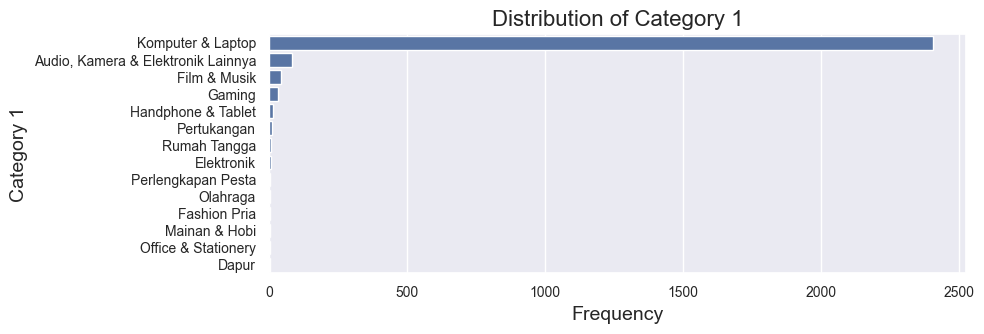

In [158]:
plt.figure(figsize=(10, 3.5))
sns.countplot(data=df_product, y='kategori_1', order=df_product['kategori_1'].value_counts().index)
plt.title('Distribution of Category 1')
plt.xlabel('Frequency')
plt.ylabel('Category 1')
plt.tight_layout()
plt.show()

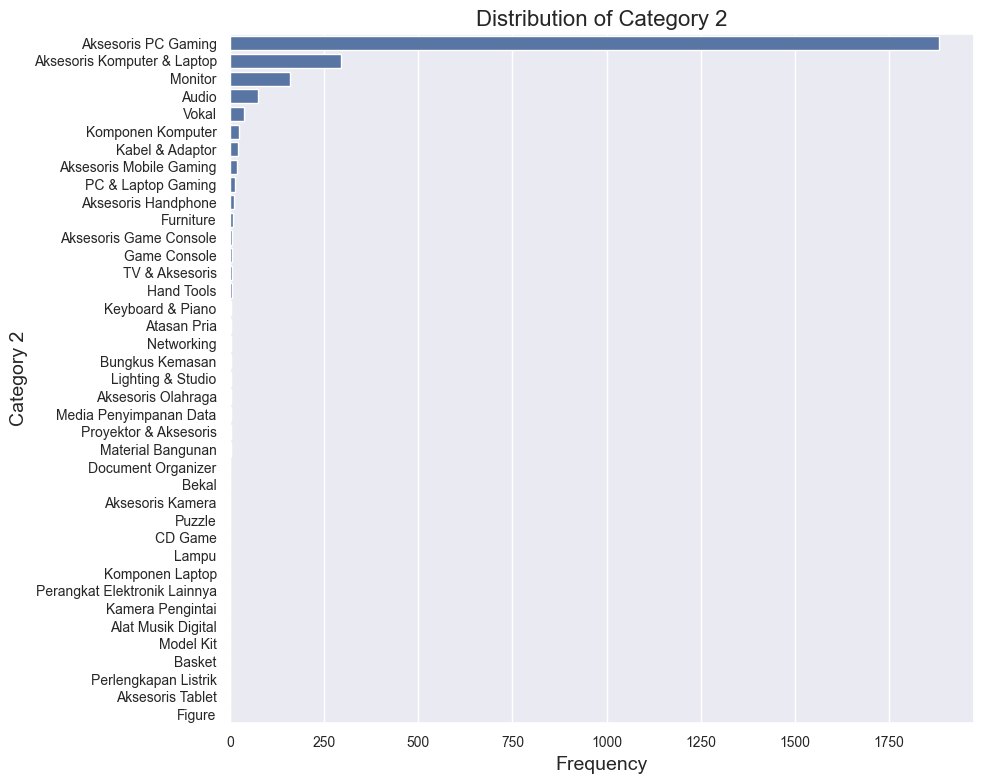

In [159]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df_product, y='kategori_2', order=df_product['kategori_2'].value_counts().index)
plt.title('Distribution of Category 2')
plt.xlabel('Frequency')
plt.ylabel('Category 2')
plt.tight_layout()
plt.show()

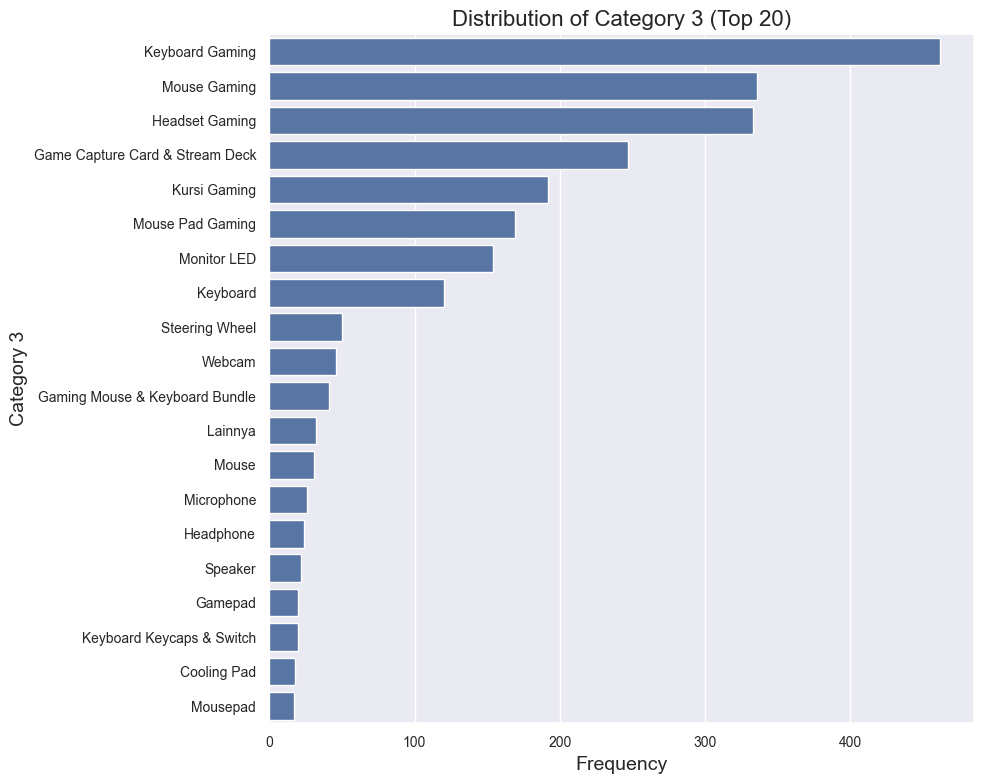

In [160]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df_product, y='kategori_3', order=df_product['kategori_3'].value_counts().head(20).index)
plt.title('Distribution of Category 3 (Top 20)')
plt.xlabel('Frequency')
plt.ylabel('Category 3')
plt.tight_layout()
plt.show()


In [161]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2613 entries, 0 to 2612
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id_produk       2613 non-null   object 
 1   nama_produk     2613 non-null   object 
 2   jumlah_terjual  2613 non-null   int64  
 3   harga_jual      2613 non-null   int64  
 4   harga_awal      2613 non-null   int64  
 5   diskon          2613 non-null   float64
 6   deskripsi       2613 non-null   object 
 7   rating          2613 non-null   float64
 8   rating_counter  2613 non-null   int64  
 9   link            2613 non-null   object 
 10  kategori_1      2613 non-null   object 
 11  kategori_2      2613 non-null   object 
 12  kategori_3      2613 non-null   object 
dtypes: float64(2), int64(4), object(7)
memory usage: 265.5+ KB


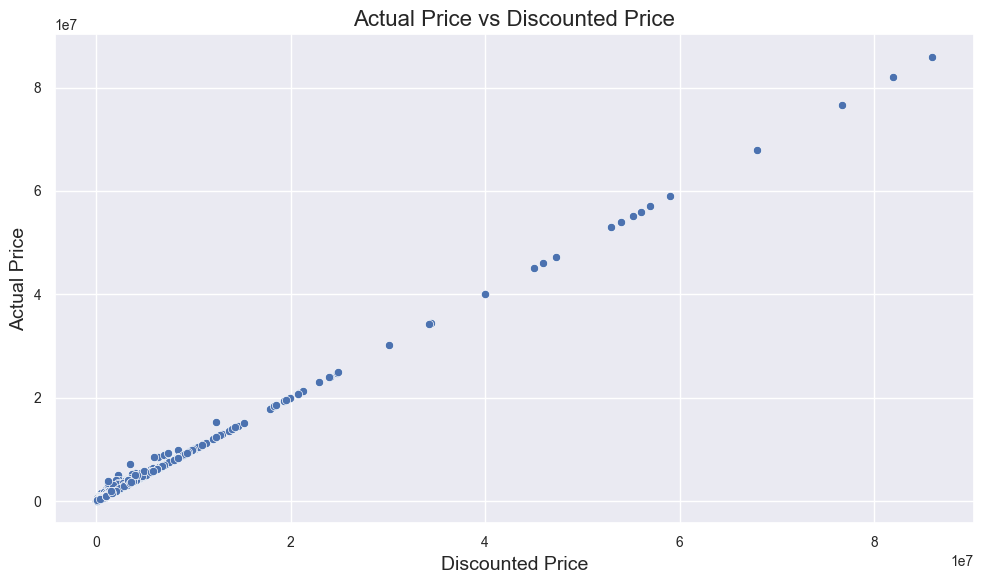

In [162]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_product, x='harga_jual', y='harga_awal')
plt.title('Actual Price vs Discounted Price')
plt.xlabel('Discounted Price')
plt.ylabel('Actual Price')
plt.tight_layout()
plt.show()

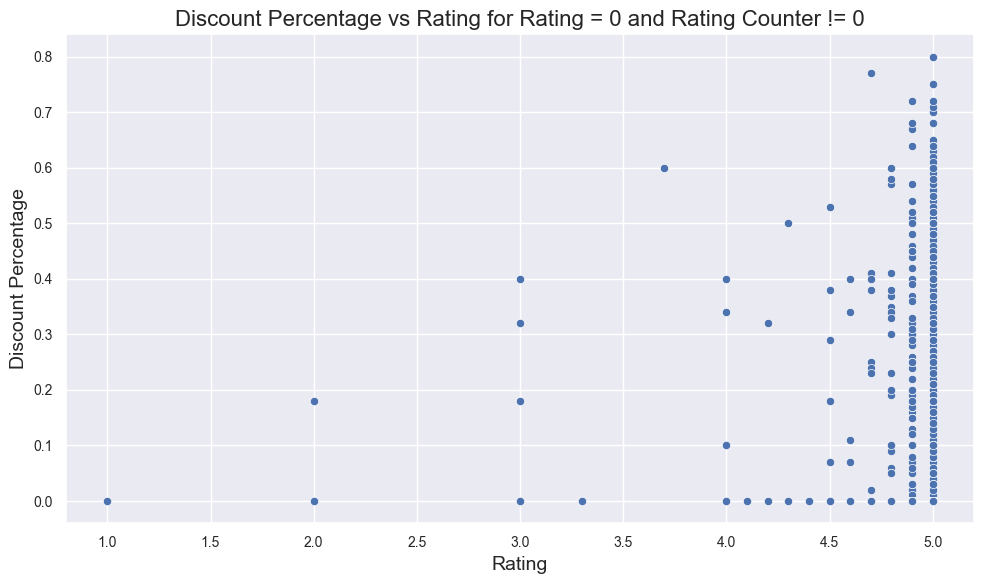

In [177]:
# Filter the data
filtered_df = df_product[(df_product['rating'] >= 0) & (df_product['rating_counter'] != 0)]

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x='rating', y='diskon')
plt.title('Discount Percentage vs Rating for Rating = 0 and Rating Counter != 0')
plt.xlabel('Rating')
plt.ylabel('Discount Percentage')
plt.tight_layout()
plt.show()

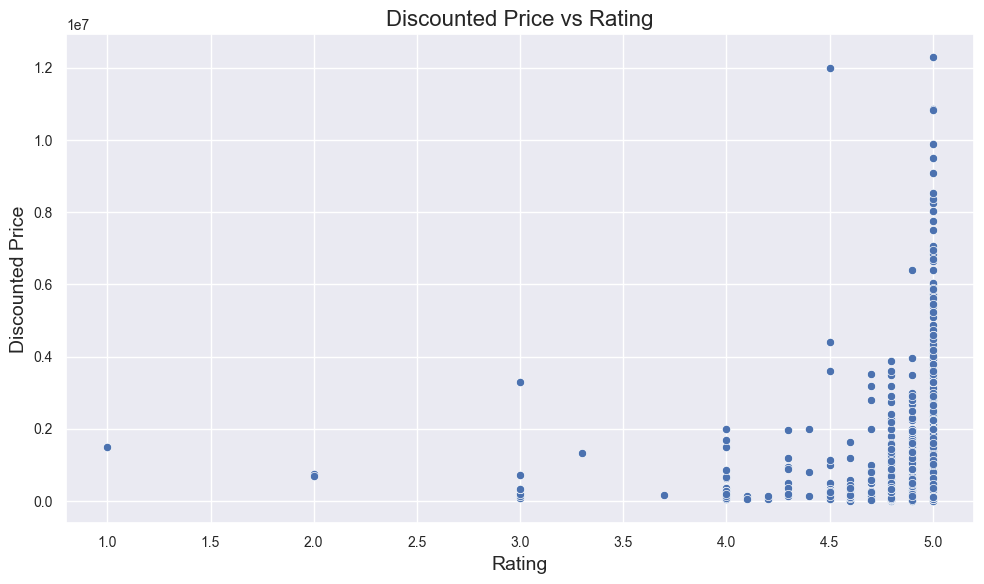

In [178]:
# Filter the data
filtered_df = df_product[(df_product['rating'] >= 0) & (df_product['rating_counter'] != 0)]

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x='rating', y='harga_jual')
plt.title('Discounted Price vs Rating')
plt.xlabel('Rating')
plt.ylabel('Discounted Price')
plt.tight_layout()
plt.show()

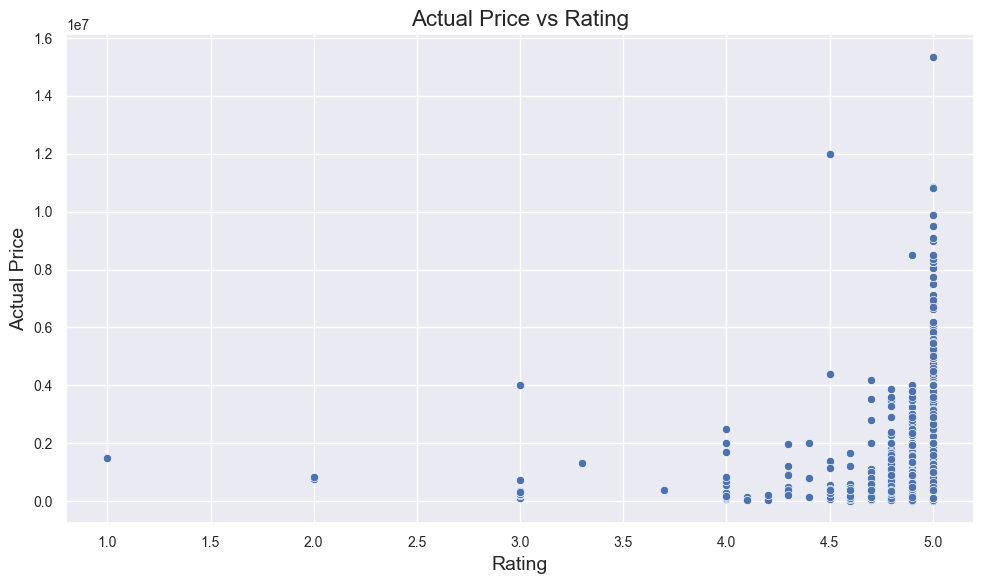

In [179]:
# Filter the data
filtered_df = df_product[(df_product['rating'] >= 0) & (df_product['rating_counter'] != 0)]

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x='rating', y='harga_awal')
plt.title('Actual Price vs Rating')
plt.xlabel('Rating')
plt.ylabel('Actual Price')
plt.tight_layout()
plt.show()

In [180]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2613 entries, 0 to 2612
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id_produk       2613 non-null   object 
 1   nama_produk     2613 non-null   object 
 2   jumlah_terjual  2613 non-null   int64  
 3   harga_jual      2613 non-null   int64  
 4   harga_awal      2613 non-null   int64  
 5   diskon          2613 non-null   float64
 6   deskripsi       2613 non-null   object 
 7   rating          2613 non-null   float64
 8   rating_counter  2613 non-null   int64  
 9   link            2613 non-null   object 
 10  kategori_1      2613 non-null   object 
 11  kategori_2      2613 non-null   object 
 12  kategori_3      2613 non-null   object 
dtypes: float64(2), int64(4), object(7)
memory usage: 265.5+ KB


In [181]:
import plotly.express as px

# Create an interactive 3D scatter plot with Plotly
fig = px.scatter_3d(df_product, x='harga_awal', y='harga_jual', z='rating', color='rating',
                     hover_data=['nama_produk'], title='Interactive 3D Scatter Plot of Rating, Actual Price, and Discounted Price')
fig.show()

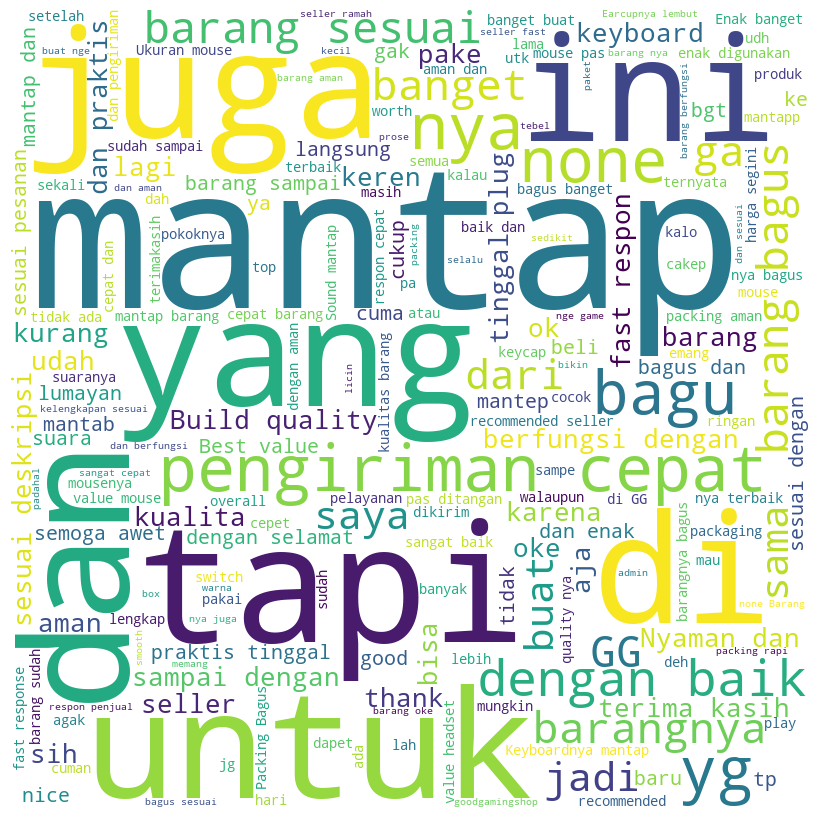

In [183]:
from wordcloud import WordCloud

product_text = ' '.join(df_review['ulasan_produk'].dropna().values)
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(product_text)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

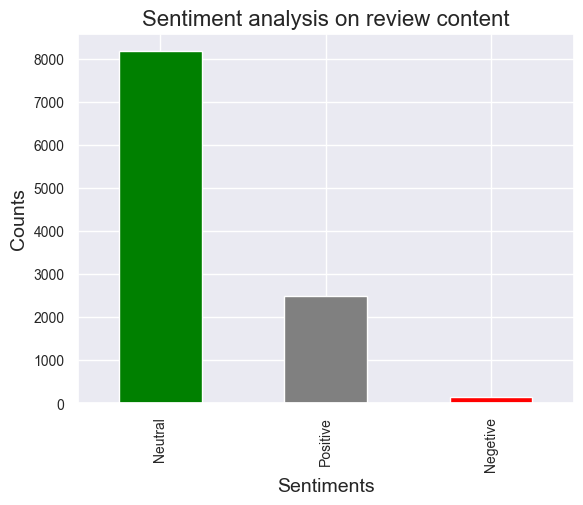

In [187]:
from textblob import TextBlob

# Classify Sentiment
def senti_als(text):
    analysis = TextBlob(text)
    # threshold for positive & negetive polarity
    if analysis.sentiment.polarity > 0.1:
        return 'Positive'
    elif analysis.sentiment.polarity < -0.1:
        return 'Negetive'
    else:
        return 'Neutral'


# apply sentiment analysis on review_content

sentimen = df_review['ulasan_produk'].apply(senti_als)
sentiment_count = sentimen.value_counts()

# plot the bar

sentiment_count.plot(kind='bar',color=['green','gray','red'],title="Sentiment analysis on review content")
plt.xlabel('Sentiments')
plt.ylabel('Counts')
plt.show()